<a href="https://colab.research.google.com/github/kurek0010/data-science-bootcamp/blob/main/02_analiza_danych/02_dane_gieldowe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* @author: krakowiakpawel9@gmail.com  
* @site: e-smartdata.org

### Pandas
>Strona biblioteki: [https://pandas.pydata.org/](https://pandas.pydata.org/)  
>Dokumentacja: [https://pandas.pydata.org/pandas-docs/stable/](https://pandas.pydata.org/pandas-docs/stable/)
>
>Podstawowa biblioteka do analizy danych w języku Python.
>
>Aby zainstalować bibliotekę Pandas użyj polecenia poniżej:
```
pip install pandas
```
### Spis treści:
1. [Import Bibliotek](#a1)
2. [Załadowanie danych](#a2)
3. [Eksploracja danych](#a3)
4. [Selekcja kolumn](#a4)
5. [Selekcja wierszy](#a5)
6. [Obliczanie nowych kolumn](#a6)
7. [Filtrowanie danych](#a7)










### <a name='a1'></a> Import Bibliotek

In [6]:
import numpy as np
import pandas as pd

print(f'Numpy: {np.__version__}')
print(f'Pandas: {pd.__version__}')

Numpy: 1.25.2
Pandas: 1.5.3


### <a name='a2'></a> Załadowanie danych

In [7]:
def fetch_financial_data(company='AMZN'):
    """Pobiera dane dotyczące notowań spółek na giełdzie według symboli
    na serwisie stooq.pl"""
    import pandas_datareader.data as web
    return web.DataReader(name=company, data_source='stooq')

df = fetch_financial_data()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2024-03-28 to 2019-04-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   float64
 4   Volume  1258 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


### <a name='a3'></a> Eksploracja danych

In [8]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2024-03-28,180.1700,181.7000,179.2600,180.3800,38051588
2024-03-27,179.8800,180.0000,177.3099,179.8300,33272551
2024-03-26,180.1500,180.4500,177.9500,178.3000,29658982
2024-03-25,178.0100,180.9900,177.2400,179.7100,29815464
2024-03-22,177.7520,179.2550,176.7500,178.8700,27995378
...,...,...,...,...,...
2019-04-05,91.4500,91.9290,91.2595,91.8640,72809520
2019-04-04,91.0325,91.4375,90.2100,90.9430,72477340
2019-04-03,91.3360,91.5000,90.4810,91.0350,79611800


In [9]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2024-03-28,180.170,181.700,179.2600,180.38,38051588
2024-03-27,179.880,180.000,177.3099,179.83,33272551
2024-03-26,180.150,180.450,177.9500,178.30,29658982
2024-03-25,178.010,180.990,177.2400,179.71,29815464
2024-03-22,177.752,179.255,176.7500,178.87,27995378


In [10]:
df.head(13)

,Open,High,Low,Close,Volume
Date,,,,,
2024-03-28,180.170,181.700,179.2600,180.380,38051588
2024-03-27,179.880,180.000,177.3099,179.830,33272551
2024-03-26,180.150,180.450,177.9500,178.300,29658982
2024-03-25,178.010,180.990,177.2400,179.710,29815464
2024-03-22,177.752,179.255,176.7500,178.870,27995378
2024-03-21,179.988,181.415,178.1500,178.150,32824320
2024-03-20,176.140,178.530,174.6400,178.150,29947150
2024-03-19,174.215,176.090,173.5200,175.900,26880893
2024-03-18,175.800,176.690,174.2800,174.480,31250688


In [11]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2019-04-05,91.4500,91.9290,91.2595,91.8640,72809520
2019-04-04,91.0325,91.4375,90.2100,90.9430,72477340
2019-04-03,91.3360,91.5000,90.4810,91.0350,79611800
2019-04-02,90.5510,91.0000,90.2560,90.6990,68962300
2019-04-01,90.0055,90.7835,89.9365,90.7095,84775040


In [12]:
df.tail(10)

,Open,High,Low,Close,Volume
Date,,,,,
2019-04-12,92.4200,92.5750,92.0650,92.1530,62288260
2019-04-11,92.4350,92.4975,92.0155,92.2035,53096840
2019-04-10,92.0500,92.4000,91.4405,92.3665,59279460
2019-04-09,92.2745,92.6545,91.5890,91.7920,74287360
2019-04-08,91.6615,92.5100,91.2555,92.4930,75056820
2019-04-05,91.4500,91.9290,91.2595,91.8640,72809520
2019-04-04,91.0325,91.4375,90.2100,90.9430,72477340
2019-04-03,91.3360,91.5000,90.4810,91.0350,79611800
2019-04-02,90.5510,91.0000,90.2560,90.6990,68962300


In [13]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [22]:
df.columns = [col.lower() for col in df.columns]
df.head()

,open,high,low,close,volume
Date,,,,,
2024-03-28,180.170,181.700,179.2600,180.38,38051588
2024-03-27,179.880,180.000,177.3099,179.83,33272551
2024-03-26,180.150,180.450,177.9500,178.30,29658982
2024-03-25,178.010,180.990,177.2400,179.71,29815464
2024-03-22,177.752,179.255,176.7500,178.87,27995378


In [17]:
df.describe()

,OPEN,HIGH,LOW,CLOSE,VOLUME
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,131.730452,133.328292,130.042050,131.708718,7.296946e+07
std,30.744741,30.996274,30.433924,30.683989,3.268574e+07
min,82.075500,83.480000,81.301600,81.820000,1.762674e+07
25%,98.801250,100.532500,97.588125,98.957375,5.156536e+07
50%,133.290000,134.575000,131.664950,133.180000,6.398431e+07
75%,160.150000,161.736000,158.196000,159.999500,8.499772e+07
max,187.200000,188.654000,184.840000,186.570000,3.113457e+08


In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
OPEN,1258.0,1.317305e+02,3.074474e+01,8.207550e+01,9.880125e+01,1.332900e+02,1.601500e+02,1.872000e+02
HIGH,1258.0,1.333283e+02,3.099627e+01,8.348000e+01,1.005325e+02,1.345750e+02,1.617360e+02,1.886540e+02
LOW,1258.0,1.300421e+02,3.043392e+01,8.130160e+01,9.758813e+01,1.316650e+02,1.581960e+02,1.848400e+02
CLOSE,1258.0,1.317087e+02,3.068399e+01,8.182000e+01,9.895737e+01,1.331800e+02,1.599995e+02,1.865700e+02
VOLUME,1258.0,7.296946e+07,3.268574e+07,1.762674e+07,5.156536e+07,6.398431e+07,8.499772e+07,3.113457e+08


### <a name='a4'></a> Selekcja kolumn

In [19]:
df = df.head(10)
df

,OPEN,HIGH,LOW,CLOSE,VOLUME
Date,,,,,
2024-03-28,180.170,181.700,179.2600,180.38,38051588
2024-03-27,179.880,180.000,177.3099,179.83,33272551
2024-03-26,180.150,180.450,177.9500,178.30,29658982
2024-03-25,178.010,180.990,177.2400,179.71,29815464
2024-03-22,177.752,179.255,176.7500,178.87,27995378
2024-03-21,179.988,181.415,178.1500,178.15,32824320
2024-03-20,176.140,178.530,174.6400,178.15,29947150
2024-03-19,174.215,176.090,173.5200,175.90,26880893
2024-03-18,175.800,176.690,174.2800,174.48,31250688


In [23]:
df['open']

Date
2024-03-28    180.170
2024-03-27    179.880
2024-03-26    180.150
2024-03-25    178.010
2024-03-22    177.752
2024-03-21    179.988
2024-03-20    176.140
2024-03-19    174.215
2024-03-18    175.800
2024-03-15    176.640
Name: open, dtype: float64

In [24]:
df.open

Date
2024-03-28    180.170
2024-03-27    179.880
2024-03-26    180.150
2024-03-25    178.010
2024-03-22    177.752
2024-03-21    179.988
2024-03-20    176.140
2024-03-19    174.215
2024-03-18    175.800
2024-03-15    176.640
Name: open, dtype: float64

In [25]:
df[['open']]

,open
Date,
2024-03-28,180.170
2024-03-27,179.880
2024-03-26,180.150
2024-03-25,178.010
2024-03-22,177.752
2024-03-21,179.988
2024-03-20,176.140
2024-03-19,174.215
2024-03-18,175.800


In [26]:
df[['open', 'close']]

,open,close
Date,,
2024-03-28,180.170,180.38
2024-03-27,179.880,179.83
2024-03-26,180.150,178.30
2024-03-25,178.010,179.71
2024-03-22,177.752,178.87
2024-03-21,179.988,178.15
2024-03-20,176.140,178.15
2024-03-19,174.215,175.90
2024-03-18,175.800,174.48


In [27]:
df.iloc[:, 0]

Date
2024-03-28    180.170
2024-03-27    179.880
2024-03-26    180.150
2024-03-25    178.010
2024-03-22    177.752
2024-03-21    179.988
2024-03-20    176.140
2024-03-19    174.215
2024-03-18    175.800
2024-03-15    176.640
Name: open, dtype: float64

In [29]:
df.iloc[:, [0,2]]

,open,low
Date,,
2024-03-28,180.170,179.2600
2024-03-27,179.880,177.3099
2024-03-26,180.150,177.9500
2024-03-25,178.010,177.2400
2024-03-22,177.752,176.7500
2024-03-21,179.988,178.1500
2024-03-20,176.140,174.6400
2024-03-19,174.215,173.5200
2024-03-18,175.800,174.2800


In [32]:
df.iloc[:, [0, 3]]

,open,close
Date,,
2024-03-28,180.170,180.38
2024-03-27,179.880,179.83
2024-03-26,180.150,178.30
2024-03-25,178.010,179.71
2024-03-22,177.752,178.87
2024-03-21,179.988,178.15
2024-03-20,176.140,178.15
2024-03-19,174.215,175.90
2024-03-18,175.800,174.48


In [33]:
df.iloc[:, 2:5]

,low,close,volume
Date,,,
2024-03-28,179.2600,180.38,38051588
2024-03-27,177.3099,179.83,33272551
2024-03-26,177.9500,178.30,29658982
2024-03-25,177.2400,179.71,29815464
2024-03-22,176.7500,178.87,27995378
2024-03-21,178.1500,178.15,32824320
2024-03-20,174.6400,178.15,29947150
2024-03-19,173.5200,175.90,26880893
2024-03-18,174.2800,174.48,31250688


In [34]:
df.iloc[:, -1]

Date
2024-03-28    38051588
2024-03-27    33272551
2024-03-26    29658982
2024-03-25    29815464
2024-03-22    27995378
2024-03-21    32824320
2024-03-20    29947150
2024-03-19    26880893
2024-03-18    31250688
2024-03-15    72147390
Name: volume, dtype: int64

In [35]:
df.iloc[:, [-1]]

,volume
Date,
2024-03-28,38051588
2024-03-27,33272551
2024-03-26,29658982
2024-03-25,29815464
2024-03-22,27995378
2024-03-21,32824320
2024-03-20,29947150
2024-03-19,26880893
2024-03-18,31250688


In [36]:
df.iloc[:, :-1]

,open,high,low,close
Date,,,,
2024-03-28,180.170,181.700,179.2600,180.38
2024-03-27,179.880,180.000,177.3099,179.83
2024-03-26,180.150,180.450,177.9500,178.30
2024-03-25,178.010,180.990,177.2400,179.71
2024-03-22,177.752,179.255,176.7500,178.87
2024-03-21,179.988,181.415,178.1500,178.15
2024-03-20,176.140,178.530,174.6400,178.15
2024-03-19,174.215,176.090,173.5200,175.90
2024-03-18,175.800,176.690,174.2800,174.48


In [38]:
df.iloc[:, -3:]

,low,close,volume
Date,,,
2024-03-28,179.2600,180.38,38051588
2024-03-27,177.3099,179.83,33272551
2024-03-26,177.9500,178.30,29658982
2024-03-25,177.2400,179.71,29815464
2024-03-22,176.7500,178.87,27995378
2024-03-21,178.1500,178.15,32824320
2024-03-20,174.6400,178.15,29947150
2024-03-19,173.5200,175.90,26880893
2024-03-18,174.2800,174.48,31250688


### <a name='a5'></a>  Selekcja wierszy

In [39]:
df

,open,high,low,close,volume
Date,,,,,
2024-03-28,180.170,181.700,179.2600,180.38,38051588
2024-03-27,179.880,180.000,177.3099,179.83,33272551
2024-03-26,180.150,180.450,177.9500,178.30,29658982
2024-03-25,178.010,180.990,177.2400,179.71,29815464
2024-03-22,177.752,179.255,176.7500,178.87,27995378
2024-03-21,179.988,181.415,178.1500,178.15,32824320
2024-03-20,176.140,178.530,174.6400,178.15,29947150
2024-03-19,174.215,176.090,173.5200,175.90,26880893
2024-03-18,175.800,176.690,174.2800,174.48,31250688


In [42]:
df.iloc[0]

open           180.17
high           181.70
low            179.26
close          180.38
volume    38051588.00
Name: 2024-03-28 00:00:00, dtype: float64

In [45]:
df.iloc[:4]

,open,high,low,close,volume
Date,,,,,
2024-03-28,180.17,181.70,179.2600,180.38,38051588
2024-03-27,179.88,180.00,177.3099,179.83,33272551
2024-03-26,180.15,180.45,177.9500,178.30,29658982
2024-03-25,178.01,180.99,177.2400,179.71,29815464


In [46]:
df

,open,high,low,close,volume
Date,,,,,
2024-03-28,180.170,181.700,179.2600,180.38,38051588
2024-03-27,179.880,180.000,177.3099,179.83,33272551
2024-03-26,180.150,180.450,177.9500,178.30,29658982
2024-03-25,178.010,180.990,177.2400,179.71,29815464
2024-03-22,177.752,179.255,176.7500,178.87,27995378
2024-03-21,179.988,181.415,178.1500,178.15,32824320
2024-03-20,176.140,178.530,174.6400,178.15,29947150
2024-03-19,174.215,176.090,173.5200,175.90,26880893
2024-03-18,175.800,176.690,174.2800,174.48,31250688


In [47]:
df.loc['2024-03-28']

open           180.17
high           181.70
low            179.26
close          180.38
volume    38051588.00
Name: 2024-03-28 00:00:00, dtype: float64

In [48]:
df.loc['2024-03-15': '2024-03-25']

,open,high,low,close,volume
Date,,,,,
2024-03-25,178.010,180.990,177.24,179.71,29815464
2024-03-22,177.752,179.255,176.75,178.87,27995378
2024-03-21,179.988,181.415,178.15,178.15,32824320
2024-03-20,176.140,178.530,174.64,178.15,29947150
2024-03-19,174.215,176.090,173.52,175.90,26880893
2024-03-18,175.800,176.690,174.28,174.48,31250688
2024-03-15,176.640,177.930,173.90,174.42,72147390


### <a name='a6'></a> Obliczanie nowych kolumn

In [49]:
df = fetch_financial_data('UBER')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1230 entries, 2024-03-28 to 2019-05-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1230 non-null   float64
 1   High    1230 non-null   float64
 2   Low     1230 non-null   float64
 3   Close   1230 non-null   float64
 4   Volume  1230 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 57.7 KB


In [50]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2024-03-28,77.90,78.05,76.895,76.99,13421916
2024-03-27,78.96,79.00,76.850,78.11,13156953
2024-03-26,79.80,80.18,77.780,77.91,12438286
2024-03-25,79.99,81.04,79.390,79.41,10254259
2024-03-22,79.80,80.45,79.200,80.23,8872408


In [51]:
df.describe()

,Open,High,Low,Close,Volume
count,1230.000000,1230.000000,1230.000000,1230.000000,1.230000e+03
mean,40.011473,40.785470,39.216225,40.014602,2.508763e+07
std,12.142159,12.231272,12.031546,12.132916,1.846464e+07
min,15.960000,17.800000,13.710000,14.820000,3.380003e+06
25%,31.002500,31.712500,30.412500,31.080000,1.572948e+07
50%,37.455000,38.250000,36.732500,37.400000,2.114233e+07
75%,46.452425,47.323750,45.805000,46.477500,2.941416e+07
max,81.940000,82.140000,80.790000,81.390000,3.642612e+08


In [52]:
df.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2024-03-28,77.90,78.05,76.895,76.99,13421916
2024-03-27,78.96,79.00,76.850,78.11,13156953
2024-03-26,79.80,80.18,77.780,77.91,12438286


In [53]:
df['Average'] = (df.Open + df.Close) / 2.0
df.head()

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2024-03-28,77.90,78.05,76.895,76.99,13421916,77.445
2024-03-27,78.96,79.00,76.850,78.11,13156953,78.535
2024-03-26,79.80,80.18,77.780,77.91,12438286,78.855
2024-03-25,79.99,81.04,79.390,79.41,10254259,79.700
2024-03-22,79.80,80.45,79.200,80.23,8872408,80.015


In [54]:
df = df.sort_index()
df.head()

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240


In [55]:
df['Close_shift'] = df.Close.shift(1)
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift
Date,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29


In [56]:
df['Daily_Change'] = df.Close / df.Close_shift - 1
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29,0.041414


In [ ]:
del df['Daily Change']

In [57]:
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29,0.041414


In [58]:
df.Daily_Change.min()

-0.21628767847699626

In [59]:
df.Daily_Change.max()

0.3825910931174088

<Axes: >

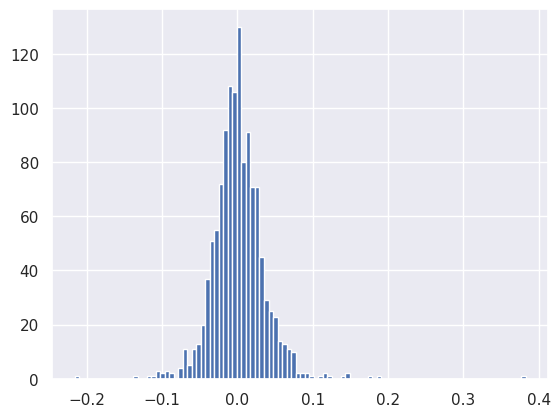

In [61]:
df.Daily_Change.hist(bins=100)

<Axes: >

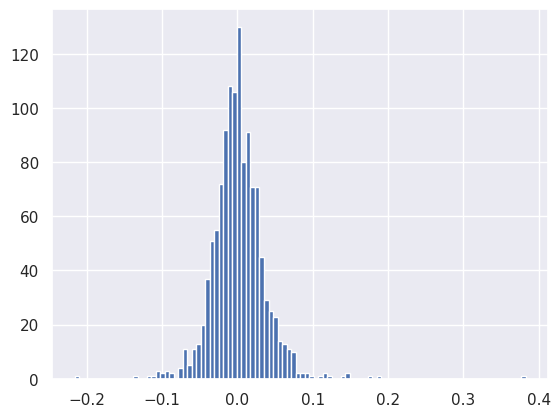

In [62]:
import seaborn as sns
sns.set()

df.Daily_Change.hist(bins=100)

<Axes: xlabel='Date'>

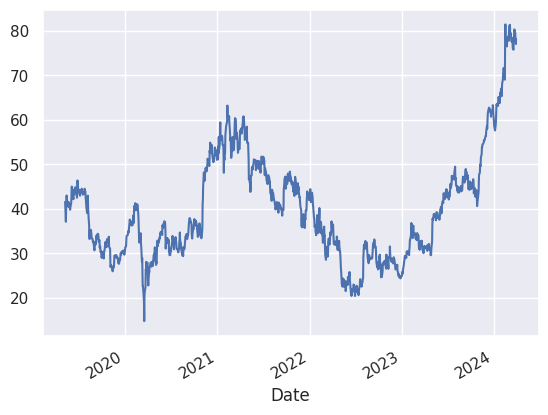

In [63]:
df.Close.plot()

### <a name='a7'></a> Filtrowanie danych

In [66]:
df

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-10,42.00,45.00,41.060,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.24,36.080,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.96,36.850,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.88,38.950,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.06,41.250,43.00,38115524,42.240,41.29,0.041414
...,...,...,...,...,...,...,...,...
2024-03-22,79.80,80.45,79.200,80.23,8872408,80.015,80.25,-0.000249
2024-03-25,79.99,81.04,79.390,79.41,10254259,79.700,80.23,-0.010221
2024-03-26,79.80,80.18,77.780,77.91,12438286,78.855,79.41,-0.018889


In [68]:
df_positive = df[df.Daily_Change > 0]
df_positive

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29,0.041414
2019-05-24,41.28,41.51,40.50,41.51,8786751,41.395,40.47,0.025698
2019-05-31,41.15,41.57,39.41,40.41,23209848,40.780,39.80,0.015327
...,...,...,...,...,...,...,...,...
2024-03-12,78.01,78.48,77.48,78.32,11303824,78.165,77.47,0.010972
2024-03-19,75.38,77.18,74.19,77.08,13035194,76.230,75.70,0.018230
2024-03-20,77.09,78.95,76.75,78.64,11490382,77.865,77.08,0.020239


In [69]:
df_positive.Daily_Change.mean()

0.025724436374661715

In [70]:
 df_negative = df[df.Daily_Change < 0]
 df_negative

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-13,38.79,39.24,36.080,37.10,79442420,37.945,41.57,-0.107529
2019-05-17,41.98,43.29,41.270,41.91,20225687,41.945,43.00,-0.025349
2019-05-20,41.19,41.68,39.460,41.59,29222330,41.390,41.91,-0.007635
2019-05-21,42.00,42.24,41.250,41.50,10802851,41.750,41.59,-0.002164
2019-05-22,41.05,41.28,40.500,41.25,9089469,41.150,41.50,-0.006024
...,...,...,...,...,...,...,...,...
2024-03-18,77.00,77.00,73.660,75.70,18936712,76.350,76.07,-0.004864
2024-03-22,79.80,80.45,79.200,80.23,8872408,80.015,80.25,-0.000249
2024-03-25,79.99,81.04,79.390,79.41,10254259,79.700,80.23,-0.010221


In [71]:
 df_negative.Daily_Change.mean()

-0.02311616842096444

In [72]:
df.Close == df.High

Date
2019-05-10    False
2019-05-13    False
2019-05-14     True
2019-05-15    False
2019-05-16    False
              ...  
2024-03-22    False
2024-03-25    False
2024-03-26    False
2024-03-27    False
2024-03-28    False
Length: 1230, dtype: bool

In [73]:
df[df.Close == df.High]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-24,41.28,41.51,40.50,41.51,8786751,41.395,40.47,0.025698
2020-08-25,31.04,31.19,30.60,31.19,10056762,31.115,31.04,0.004832
2020-12-04,52.71,54.86,52.71,54.86,22207887,53.785,52.52,0.044554
2021-02-04,56.45,57.85,56.11,57.85,13847255,57.150,57.12,0.012780
2022-11-30,27.80,29.14,27.64,29.14,18177028,28.470,27.76,0.049712


In [74]:
df[df.Close == df.Low]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-08-12,39.84,39.95,37.00,37.00,20632310,38.420,40.05,-0.076155
2019-12-09,27.96,28.36,27.68,27.68,21098387,27.820,27.86,-0.006461
2019-12-27,30.80,31.06,30.17,30.17,18465965,30.485,30.67,-0.016303
2020-12-31,53.28,53.28,51.00,51.00,13282786,52.140,53.15,-0.040452
2021-12-31,42.53,43.12,41.93,41.93,13746893,42.230,42.66,-0.017112
2023-01-05,25.73,26.01,25.55,25.55,9942038,25.640,25.91,-0.013894
2023-05-16,37.93,38.15,37.44,37.44,21836864,37.685,38.14,-0.018353
2023-05-30,38.73,39.06,37.56,37.56,18143192,38.145,38.45,-0.023147


In [80]:
df.index

DatetimeIndex(['2019-05-10', '2019-05-13', '2019-05-14', '2019-05-15',
               '2019-05-16', '2019-05-17', '2019-05-20', '2019-05-21',
               '2019-05-22', '2019-05-23',
               ...
               '2024-03-15', '2024-03-18', '2024-03-19', '2024-03-20',
               '2024-03-21', '2024-03-22', '2024-03-25', '2024-03-26',
               '2024-03-27', '2024-03-28'],
              dtype='datetime64[ns]', name='Date', length=1230, freq=None)

In [81]:
df.index > '2019-11-01'

array([False, False, False, ...,  True,  True,  True])

In [77]:
df[df.index > '2019-11-01']

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-11-04,31.45,31.75,30.120,31.08,32330121,31.265,31.37,-0.009245
2019-11-05,29.13,29.30,27.970,28.02,52180615,28.575,31.08,-0.098456
2019-11-06,26.06,27.55,25.580,26.94,133569790,26.500,28.02,-0.038544
2019-11-07,26.80,27.42,26.450,27.38,65949472,27.090,26.94,0.016333
2019-11-08,27.48,27.62,26.915,27.01,45263118,27.245,27.38,-0.013514
...,...,...,...,...,...,...,...,...
2024-03-22,79.80,80.45,79.200,80.23,8872408,80.015,80.25,-0.000249
2024-03-25,79.99,81.04,79.390,79.41,10254259,79.700,80.23,-0.010221
2024-03-26,79.80,80.18,77.780,77.91,12438286,78.855,79.41,-0.018889


In [82]:
df[(df.index >= '2019-11-01') & (df.index < '2019-11-15')]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-11-01,31.45,31.70,30.7412,31.37,10460430,31.410,31.50,-0.004127
2019-11-04,31.45,31.75,30.1200,31.08,32330121,31.265,31.37,-0.009245
2019-11-05,29.13,29.30,27.9700,28.02,52180615,28.575,31.08,-0.098456
2019-11-06,26.06,27.55,25.5800,26.94,133569790,26.500,28.02,-0.038544
2019-11-07,26.80,27.42,26.4500,27.38,65949472,27.090,26.94,0.016333
2019-11-08,27.48,27.62,26.9150,27.01,45263118,27.245,27.38,-0.013514
2019-11-11,27.03,27.21,26.2300,27.14,41445732,27.085,27.01,0.004813
2019-11-12,27.38,27.66,26.6600,26.70,37095389,27.040,27.14,-0.016212
2019-11-13,26.47,26.82,26.1400,26.71,34512663,26.590,26.70,0.000375


In [83]:
df[(df.index == '2019-11-01') | (df.index == '2019-11-07')]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-11-01,31.45,31.70,30.7412,31.37,10460430,31.41,31.50,-0.004127
2019-11-07,26.80,27.42,26.4500,27.38,65949472,27.09,26.94,0.016333


In [84]:
df

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-10,42.00,45.00,41.060,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.24,36.080,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.96,36.850,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.88,38.950,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.06,41.250,43.00,38115524,42.240,41.29,0.041414
...,...,...,...,...,...,...,...,...
2024-03-22,79.80,80.45,79.200,80.23,8872408,80.015,80.25,-0.000249
2024-03-25,79.99,81.04,79.390,79.41,10254259,79.700,80.23,-0.010221
2024-03-26,79.80,80.18,77.780,77.91,12438286,78.855,79.41,-0.018889


In [85]:
df[df.index.month == 5]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-10,42.00,45.000,41.060,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.240,36.080,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.960,36.850,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.880,38.950,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.060,41.250,43.00,38115524,42.240,41.29,0.041414
...,...,...,...,...,...,...,...,...
2023-05-24,38.05,38.660,37.770,37.96,22074721,38.005,38.66,-0.018107
2023-05-25,38.48,38.585,37.525,37.95,18634222,38.215,37.96,-0.000263
2023-05-26,38.24,38.760,38.220,38.45,14438769,38.345,37.95,0.013175


In [86]:
df[df.index.year == 2023]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2023-01-03,25.37,25.750,25.0200,25.36,22155275,25.365,24.73,0.025475
2023-01-04,25.73,25.970,25.3200,25.91,14815960,25.820,25.36,0.021688
2023-01-05,25.73,26.010,25.5500,25.55,9942038,25.640,25.91,-0.013894
2023-01-06,25.86,26.540,25.4000,26.40,19443753,26.130,25.55,0.033268
2023-01-09,27.30,28.050,27.1500,27.40,24962057,27.350,26.40,0.037879
...,...,...,...,...,...,...,...,...
2023-12-22,61.70,62.235,61.2800,61.71,14715609,61.705,61.46,0.004068
2023-12-26,61.71,62.200,61.3136,61.98,16077192,61.845,61.71,0.004375
2023-12-27,62.00,63.430,62.0000,63.28,20805951,62.640,61.98,0.020975


In [87]:
df[df.index.day == 1]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-07-01,46.980,47.0400,44.0600,44.27,17739998,45.6250,46.38,-0.045494
2019-08-01,42.140,42.5355,41.0000,41.31,7349740,41.7250,42.14,-0.019696
2019-10-01,30.370,30.5100,28.6500,29.15,13448055,29.7600,30.47,-0.043321
2019-11-01,31.450,31.7000,30.7412,31.37,10460430,31.4100,31.50,-0.004127
2020-04-01,26.500,26.7670,24.8101,25.42,38538381,25.9600,27.92,-0.089542
2020-05-01,29.130,29.7200,28.3250,28.39,19290192,28.7600,30.27,-0.062108
2020-06-01,35.640,36.3900,35.1600,35.82,21893806,35.7300,36.32,-0.013767
2020-07-01,30.960,31.2650,30.1622,30.43,13611544,30.6950,31.08,-0.020914
2020-09-01,33.450,34.5100,33.1450,34.30,16026170,33.8750,33.63,0.019923


In [89]:
import pandas as pd
import pandas_datareader.data as web


df = web.DataReader(name='META', data_source='stooq')
df

,Open,High,Low,Close,Volume
Date,,,,,
2024-03-28,492.84,492.89,485.1500,485.58,15212764
2024-03-27,499.30,499.89,488.0700,493.86,9989676
2024-03-26,505.13,510.00,495.2137,495.89,11205382
2024-03-25,505.79,507.22,500.2411,503.02,8380617
2024-03-22,507.00,509.97,504.3400,509.58,8120593
...,...,...,...,...,...
2019-04-05,176.88,177.00,175.1000,175.72,9594133
2019-04-04,176.02,178.00,175.5300,176.02,17847731
2019-04-03,174.50,177.96,172.9500,173.54,27590058
